In [1]:
library(igraph)
library(ggplot2)

Warning message:
"package 'igraph' was built under R version 3.5.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"

In [ ]:
#sample_gnp(n, p, directed = FALSE, loops = FALSE)

In [ ]:
g1 = sample_gnp(1000, 0.003)
g2 = sample_gnp(1000, 0.004)
g3 = sample_gnp(1000, 0.01)
g4 = sample_gnp(1000, 0.05)
g5 = sample_gnp(1000, 0.1)

In [ ]:
dd1 = degree_distribution(g1)*1000
dd2 = degree_distribution(g2)*1000
dd3 = degree_distribution(g3)*1000
dd4 = degree_distribution(g4)*1000
dd5 = degree_distribution(g5)*1000

In [ ]:
lab1 = seq(0, length(dd1)-1)
lab2 = seq(0, length(dd2)-1)
lab3 = seq(0, length(dd3)-1)
lab4 = seq(0, length(dd4)-1)
lab5 = seq(0, length(dd5)-1)

In [ ]:
plot(lab1, dd1, type="l", main="Degree Distribution", xlab="Degree", ylab="Number of Vertices")

In [ ]:
plot(lab2, dd2, type="l", main="Degree Distribution", xlab="Degree", ylab="Number of Vertices")

In [ ]:
plot(lab3, dd3, type="l", main="Degree Distribution", xlab="Degree", ylab="Number of Vertices")

In [ ]:
plot(lab4, dd4, type="l", main="Degree Distribution", xlab="Degree", ylab="Number of Vertices")

In [ ]:
plot(lab5, dd5, type="b", main="Degree Distribution", xlab="Degree", ylab="Number of Vertices")

In [ ]:
sprintf("For p=0.003 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean(dd1), var(dd1))

In [ ]:
sprintf("For p=0.004 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean(dd2), var(dd2))

In [ ]:
sprintf("For p=0.01 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean(dd3), var(dd3))

In [ ]:
sprintf("For p=0.05 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean(dd4), var(dd4))

In [ ]:
sprintf("For p=0.1 :")
sprintf("Observed Mean = %f    Observed Variance = %f", mean(dd5), var(dd5))

In [ ]:
# Selecting the Largest Connected Component GCC if the graph is not connected

In [ ]:
print_gcc <- function(g) {
    c = clusters(g)
    i = which.max(c$csize)
    v_bool = c$membership==1
    v = V(g)[v_bool]
    s_g = induced.subgraph(g, v)
    d = diameter(s_g)
    if (is_connected(g)) {
            sprintf ("This graph is connected. Size of GCC is : %d and Diameter of GCC is: %d", max(c$csize), d)
    }
    else {
        sprintf ("Size of GCC is : %d and Diameter of GCC is: %d", max(c$csize), d)
    }  
}

In [ ]:
print_gcc(g1)
print_gcc(g2)
print_gcc(g3)
print_gcc(g4)
print_gcc(g5)

In [ ]:
# 1.(c) 

In [ ]:
# Selecting a pmax where the graph is always connected

In [ ]:
conn_prob <- function(p, th) {
    count = 0
    for (i in 1:1000){
        g = sample_gnp(100, p)
        if (is_connected(g)){
             count = count + 1
        }       
    }
    if ((count/100.0) > th)
        return (TRUE)
    return (FALSE)
}

In [ ]:
thresh = 0.9
conn_prob(0.0001, thresh)
conn_prob(0.0003, thresh)
conn_prob(0.0005, thresh)
conn_prob(0.0006, thresh)
conn_prob(0.0008, thresh)
conn_prob(0.001, thresh)
conn_prob(0.005, thresh)
conn_prob(0.007, thresh)
conn_prob(0.008, thresh)
conn_prob(0.009, thresh)
conn_prob(0.01, thresh)
conn_prob(0.011, thresh)
conn_prob(0.012, thresh)
conn_prob(0.013, thresh)
conn_prob(0.015, thresh)
conn_prob(0.018, thresh)
conn_prob(0.02, thresh)

In [ ]:
get_gcc_size <- function(g) {
    c = clusters(g)
    return (max(c$csize))
}

In [ ]:
Pmax = 0.01
n = 1000
step = 0.00001

p = 0.0
count = 1

while (p <= Pmax){
    p = p + step
    count  = count + 1
}


all_gccs <- rep(0, 100*(count-1))
all_ps <- rep(0, 100*(count-1))

p_99 <- rep(0, count-1)
norm_gccs <- rep(0, count-1)
ps <- rep(0, count-1)

In [ ]:
p = 0.0
count  = 1
all_count = 1
GCClim = 0.99
p_99 <- vector()

while (p < Pmax){
    v <- rep(0, 100)
    gcc = 0
    for (i in 1:100){
        g = sample_gnp(1000, p)
        size = get_gcc_size(g)
        norm_size = size/1000.0
        v[i] = norm_size
        
        if (norm_size >= GCClim){
            gcc = gcc + 1
        }
        
        all_gccs[all_count] = norm_size
        all_ps[all_count] = p
        all_count = all_count + 1
    }
    
    if (gcc >= 90){
        p_99[count] = 1
    }
    norm_gccs[count] = mean(v)
    ps[count] = p
    p = p + step
    count  = count + 1
}

In [ ]:
plot(all_ps, all_gccs, type="p", main="Normalized GCCs", xlab="p", ylab="Normalized GCC Size", pch='.')
lines(ps, norm_gccs, col = "red")

In [ ]:
plot(ps, p_99, type="p", main="Very Large GCCs", xlab="p", ylab="T/F", pch = ".")

In [ ]:
exp_gcc_degree <- function(c) {
    count = 0
    for (n in 100:1000){
        count = count + 1
    }

    ns <- rep(0, count)
    gcc_size <- rep(0, count)

    count = 1
    for (n in 100:1000){
        p = c/n
        sizes = 0.0
        for (i in 1:1000){
            g = sample_gnp(n, p)
            sizes = sizes + get_gcc_size(g)
        }
        sizes = sizes/1000.0
        ns[count] = n
        gcc_size[count] = sizes
        count = count + 1
    }
    
    return (list(ns,gcc_size))
}


In [ ]:
c = 0.5
ng1 = exp_gcc_degree(c)
ns1 = ng1[[1]]
gccs1 = ng1[[2]]

In [ ]:
plot(ns1, gccs1, type="l", main="Sizes of GCCs, c = 0.5", xlab="n", ylab="GCC Size", pch = ".")

In [ ]:
c = 1.0
ng2 = exp_gcc_degree(c)
ns2 = ng2[[1]]
gccs2 = ng2[[2]]

In [ ]:
plot(ns2, gccs2, type="l", main="Sizes of GCCs, c = 1.0", xlab="n", ylab="GCC Size", pch = ".")

In [ ]:
c = 1.1
ng3 = exp_gcc_degree(c)
ns3 = ng3[[1]]
gccs3 = ng3[[2]]

In [ ]:
c = 1.2
ng4 = exp_gcc_degree(c)
ns4 = ng4[[1]]
gccs4 = ng4[[2]]

In [ ]:
c = 1.3
ng5 = exp_gcc_degree(c)
ns5 = ng5[[1]]
gccs5 = ng5[[2]]

In [ ]:
plot(ns3, gccs3, type="l", main="Sizes of GCCs, c = 1.1, 1.2 and 1.3", xlab="n", ylab="GCC Size", pch = ".")
lines(ns4, gccs4, col = "red")
lines(ns5, gccs5, col = "blue")
legend("bottomright", inset=0.2, legend=c("c=1.1", "c=1.2", "c=1.3"),
       col=c("black", "red", "blue"), lty=1:1, cex=0.8)

In [31]:
# Question 2 - Preferential Attatchment Model

In [32]:
#(a) Barbasi Albert Model

In [33]:
conn = 1
for (i in 1:100){
    g_pa_t = sample_pa(n=1000, m=1, directed=FALSE)
    conn = conn & (is_connected(g_pa_t))
}
print (conn)

[1] TRUE


In [34]:
g_pa = sample_pa(n=1000, m=1, directed=FALSE)
r1 = cluster_fast_greedy(g_pa, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g_pa, r1_mem)

[1] 0.9317626

In [35]:
g_pa_big = sample_pa(n=10000, m=1, directed=FALSE)
r2 = cluster_fast_greedy(g_pa_big, merges = FALSE, modularity = FALSE, membership = TRUE)
r2_mem = membership(r2)
modularity(g_pa_big, r2_mem)

[1] 0.9779061

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"18 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"

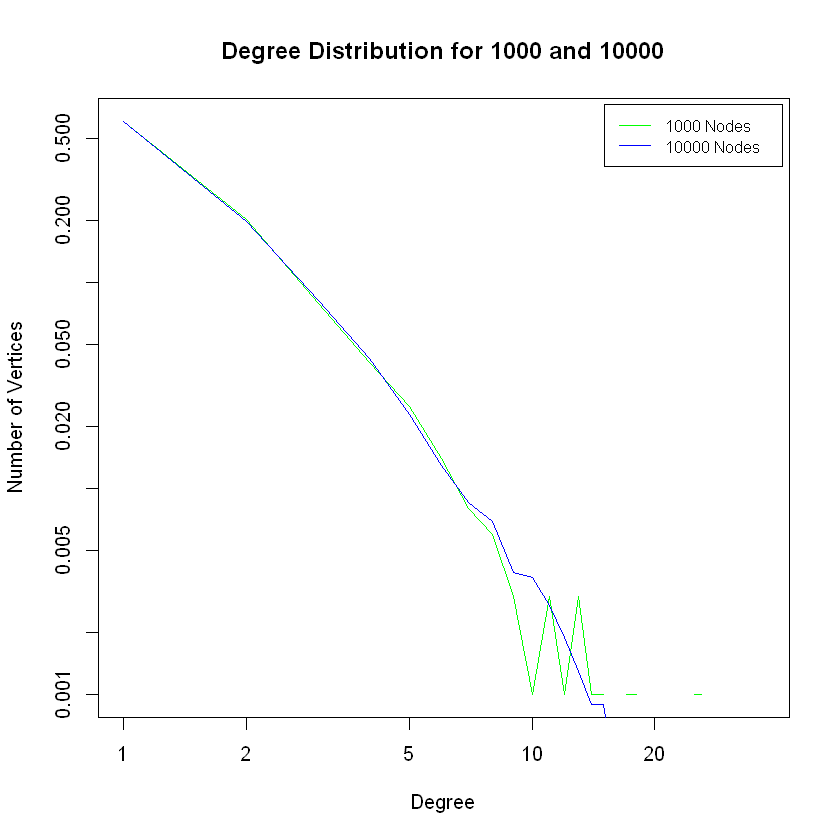

In [38]:
dd1 = degree_distribution(g_pa)
lab1 = seq(0, length(dd1)-1)
plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000", xlab="Degree", ylab="Number of Vertices", col="green", log="xy")

dd2 = degree_distribution(g_pa_big)
lab2 = seq(0, length(dd2)-1)
lines(lab2, dd2, col = "blue", log="xy")


legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

In [87]:
df1 <- data.frame("degree"=log(lab1), "freq"=log(dd1))
df1 <- df1[!is.infinite(rowSums(df1)),]

In [88]:
df2 <- data.frame("degree"=log(lab2), "freq"=log(dd2))
df2 <- df2[!is.infinite(rowSums(df2)),]

In [89]:
relation1 <- lm(freq ~ degree, df1[1:13,])
pred1 = predict(relation1)

In [90]:
relation2 <- lm(freq ~ degree, df2[1:13,])
pred2 = predict(relation2)

In [99]:
relation1


relation2


Call:
lm(formula = freq ~ degree, data = df1[1:13, ])

Coefficients:
(Intercept)       degree  
   0.001431    -2.527236  



Call:
lm(formula = freq ~ degree, data = df2[1:13, ])

Coefficients:
(Intercept)       degree  
   -0.04792     -2.43751  


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"18 y values <= 0 omitted from logarithmic plot"

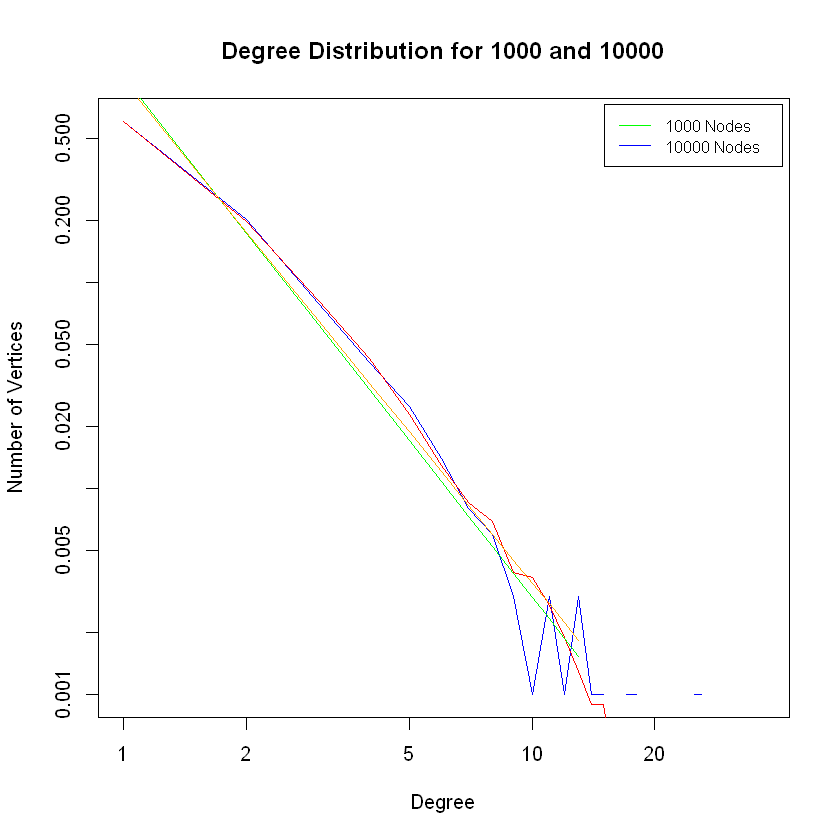

In [92]:
plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000", xlab="Degree", ylab="Number of Vertices", col="blue", log="xy")
lines(lab2, dd2, col = "red", type="l")

lines(exp(df1[["degree"]][1:13]), exp(pred1), type="l" ,col = "green")
lines(exp(df2[["degree"]][1:13]), exp(pred2), type="l", col = "orange")

legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

In [125]:
# Choosing 100 samples from the graph with 1000 nodes
# Choosinf 1000 samples from the graph with 10,000 nodes

samples1 = sample(1:1000, 400, replace=1)
samples2 = sample(1:10000, 4000, replace=1)

In [126]:
vs1 = adjacent_vertices(g_pa, samples1)
vs2 = adjacent_vertices(g_pa_big, samples2)

In [127]:
degs1 <- rep(0, length(vs1))
for (k in 1:length(vs1)){
  ind = sample(1:length(vs1[[k]]), 1)
  degs1[k] = degree(g_pa, vs1[[k]][ind])
  }  

cts1 = as.data.frame(table(degs1))

# inds1 <- vector() 
# degs1 <- vector()
# for (k in 1:length(vs1)){
#   ind = sample(1:length(vs1[[k]]), 1)
#   degs1 <- c(degs1 ,degree(g_pa, vs1[[k]][ind]))
#   inds1 <- c(inds1, vs1[[k]][ind])  
#   }  

In [128]:
degs2 <- rep(0, length(vs2))
for (k in 1:length(vs2)){
  ind = sample(1:length(vs2[[k]]), 1)
  degs2[k] = degree(g_pa_big, vs2[[k]][ind])
  }  

cts2 = as.data.frame(table(degs2))

# inds2 <- vector() 
# degs2 <- vector()
# for (k in 1:length(vs2)){
#   ind = sample(1:length(vs2[[k]]), 1)
#   degs2 <- c(degs2 ,degree(g_pa_big, vs2[[k]][ind]))
#   inds2 <- c(inds2, vs2[[k]][ind])  
#   } 

In [129]:
cts1_deg = rep(0,length(cts1[["degs1"]]))
cts1_freq = rep(0,length(cts1[["Freq"]]))

for (x in 1:length(cts1[["degs1"]])){
    cts1_deg[x] = cts1[["degs1"]][x]
    cts1_freq[x] = cts1[["Freq"]][x]
}


cts2_deg = rep(0,length(cts2[["degs2"]]))
cts2_freq = rep(0,length(cts2[["Freq"]]))

for (x in 1:length(cts2[["degs2"]])){
    cts2_deg[x] = cts2[["degs2"]][x]
    cts2_freq[x] = cts2[["Freq"]][x]
}

In [130]:
df1 <- data.frame("degree"=log(cts1_deg), "freq"=log(cts1_freq))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(cts2_deg), "freq"=log(cts2_freq))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1)
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2)
pred2 = predict(relation2)

relation1

relation2


Call:
lm(formula = freq ~ degree, data = df1)

Coefficients:
(Intercept)       degree  
      5.024       -1.294  



Call:
lm(formula = freq ~ degree, data = df2)

Coefficients:
(Intercept)       degree  
      7.934       -1.703  


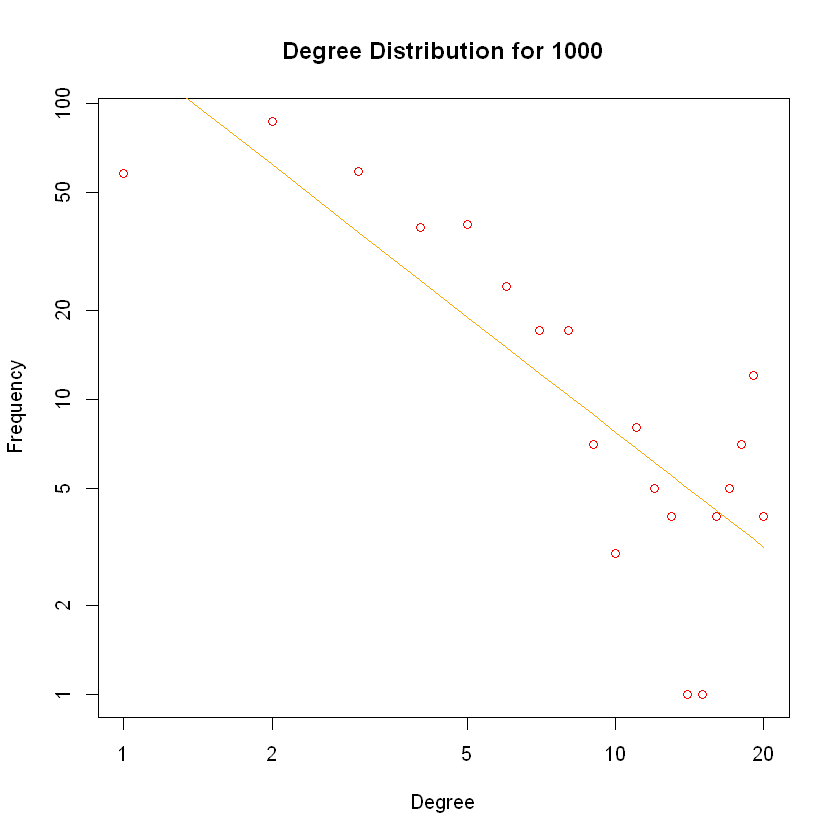

In [131]:
plot(cts1_deg, cts1_freq, type = "p", col="red", main="Degree Distribution for 1000", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df1[["degree"]]), exp(pred1), type="l" ,col = "orange")


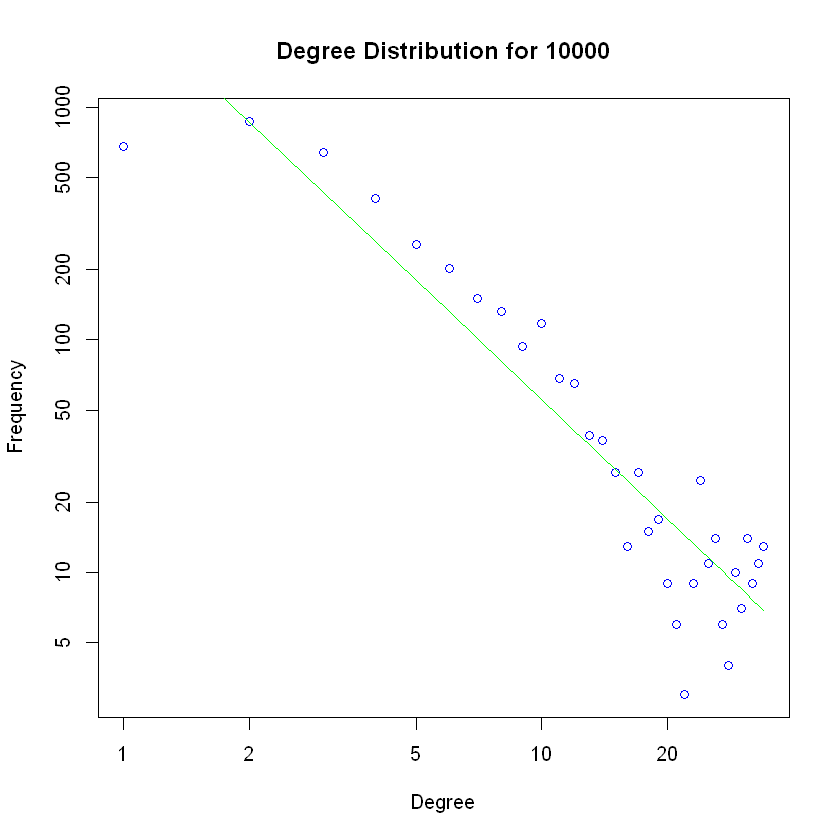

In [132]:
plot(cts2_deg, cts2_freq,, type = "p", col="blue", main="Degree Distribution for 10000", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df2[["degree"]]), exp(pred2), type="l" ,col = "green")

In [152]:
all_degrees1 = degree(g_pa, 1:1000)
all_degrees2 = degree(g_pa_big, 1:1000)

In [153]:
df1 <- data.frame("degree"=log(all_degrees1), "node"=log(c(1:1000)))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(all_degrees2), "node"=log(c(1:1000)))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(degree ~ node, df1)
pred1 = predict(relation1)

relation2 <- lm(degree ~ node, df2)
pred2 = predict(relation2)

relation1

relation2


Call:
lm(formula = degree ~ node, data = df1)

Coefficients:
(Intercept)         node  
     2.8433      -0.4091  



Call:
lm(formula = degree ~ node, data = df2)

Coefficients:
(Intercept)         node  
     3.6711      -0.3891  


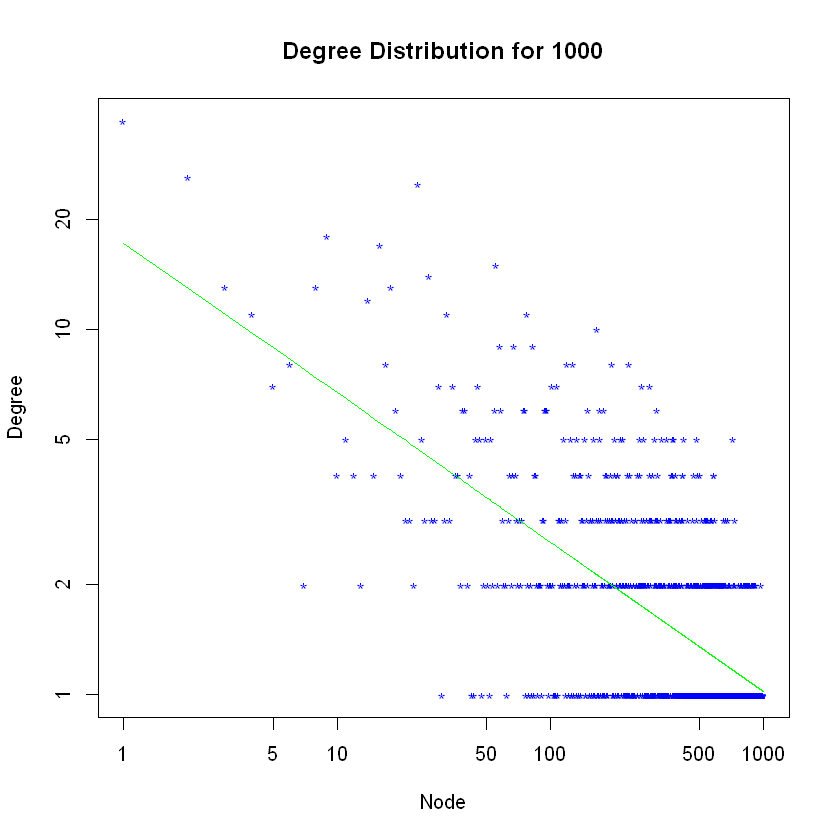

In [154]:
plot(1:1000, all_degrees1, type = "p", col="blue", main="Degree Distribution for 1000", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df1[["node"]]), exp(pred1), type="l" ,col = "green")

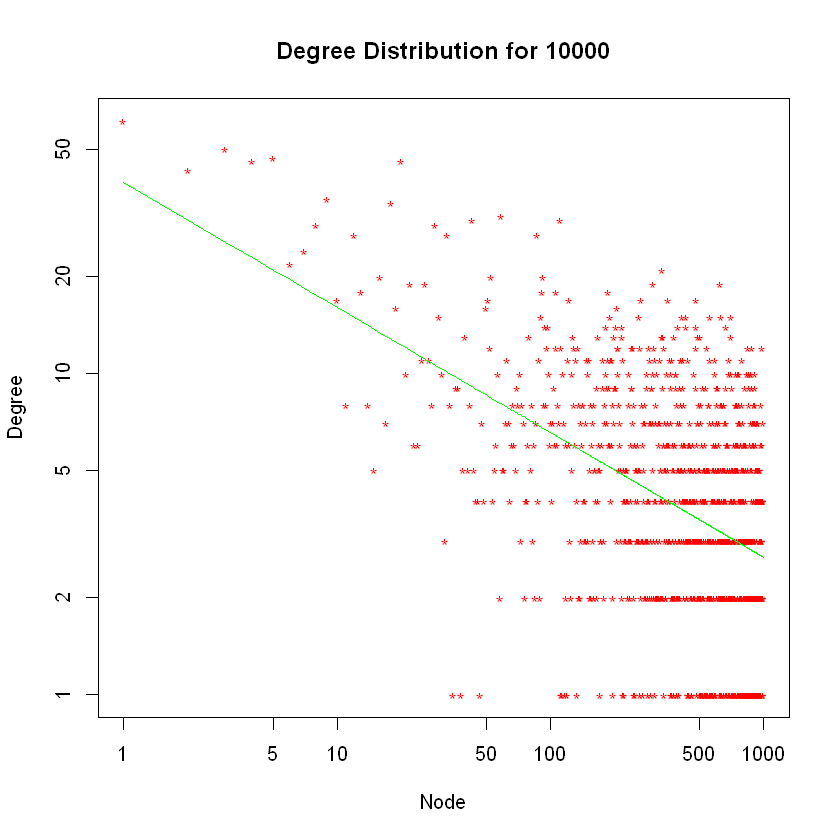

In [155]:
plot(1:1000, all_degrees2, type = "p", col="red", main="Degree Distribution for 10000", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df2[["node"]]), exp(pred2), type="l" ,col = "green")

[1] 0.5256256

[1] 0.5296332

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"21 y values <= 0 omitted from logarithmic plot"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""log" is not a graphical parameter"


Call:
lm(formula = freq ~ degree, data = df1[1:13, ])

Coefficients:
(Intercept)       degree  
      1.416       -2.655  



Call:
lm(formula = freq ~ degree, data = df2[1:13, ])

Coefficients:
(Intercept)       degree  
      1.233       -2.536  


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"21 y values <= 0 omitted from logarithmic plot"

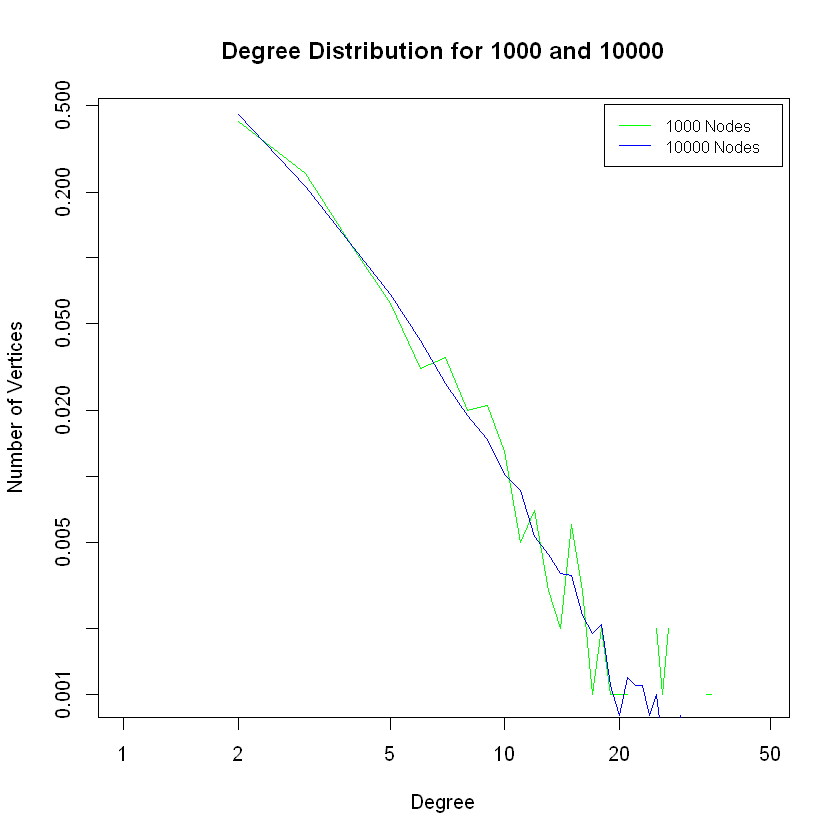


Call:
lm(formula = freq ~ degree, data = df1)

Coefficients:
(Intercept)       degree  
      4.794       -1.141  



Call:
lm(formula = freq ~ degree, data = df2)

Coefficients:
(Intercept)       degree  
      7.744       -1.536  


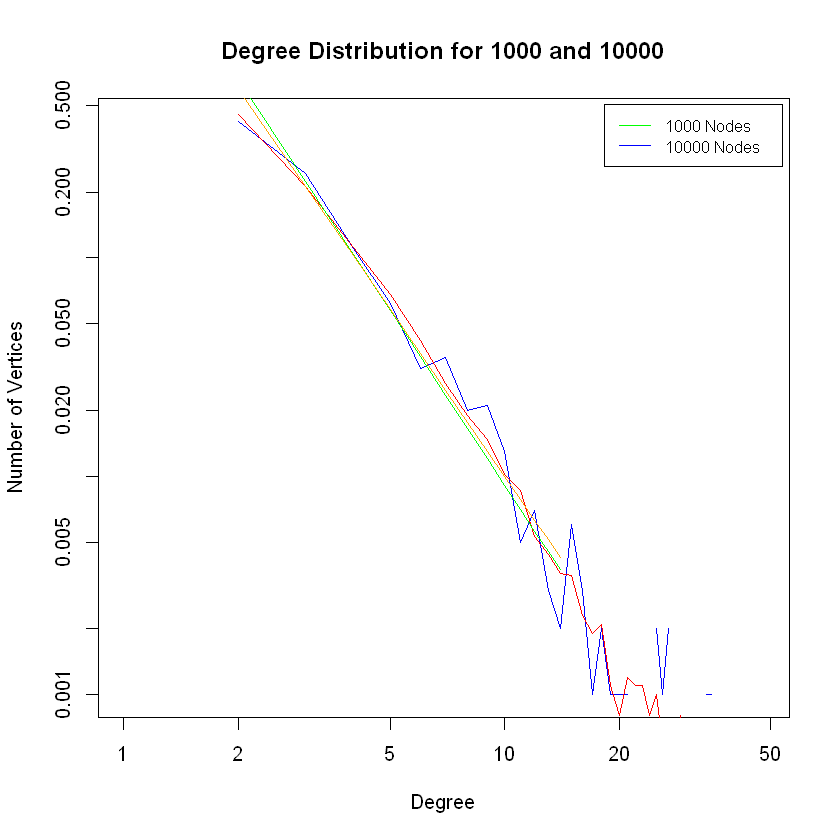

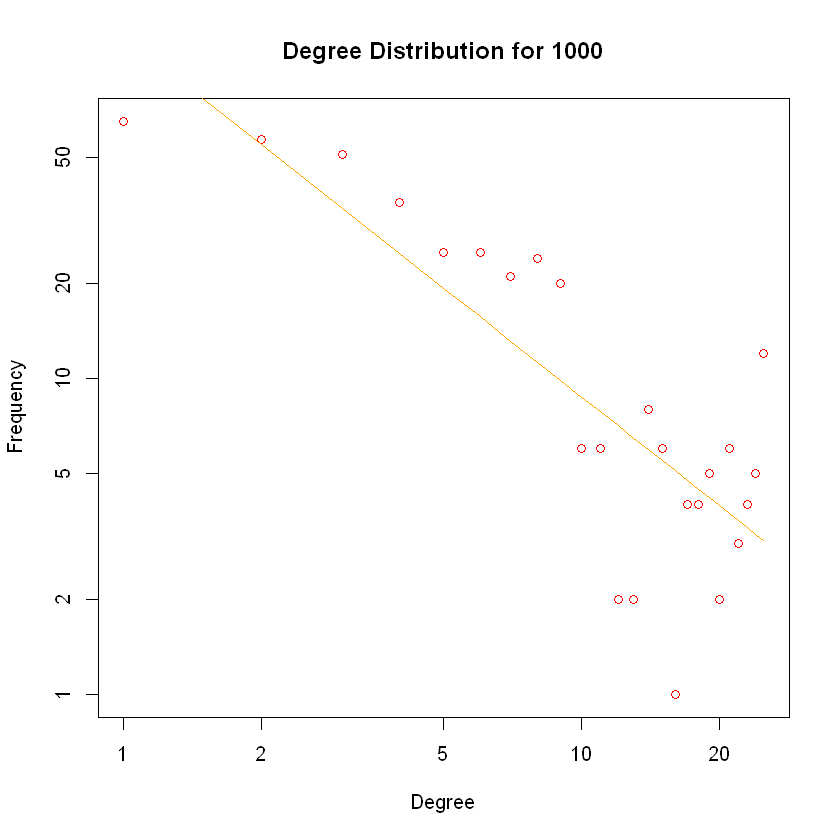


Call:
lm(formula = degree ~ node, data = df1)

Coefficients:
(Intercept)         node  
     3.8122      -0.4465  



Call:
lm(formula = degree ~ node, data = df2)

Coefficients:
(Intercept)         node  
     4.6921      -0.4286  


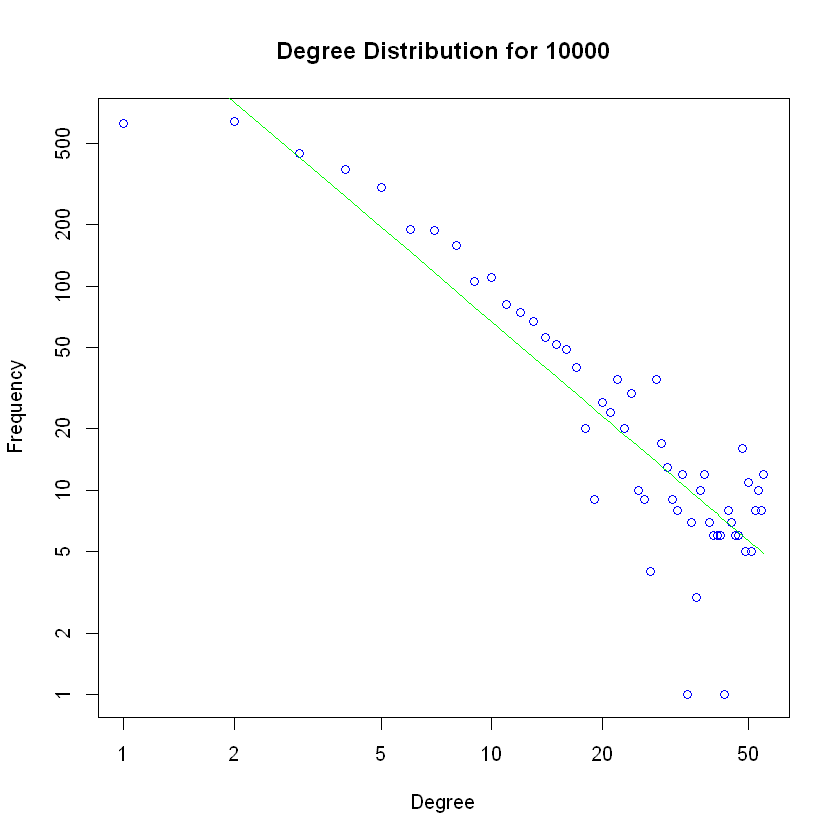

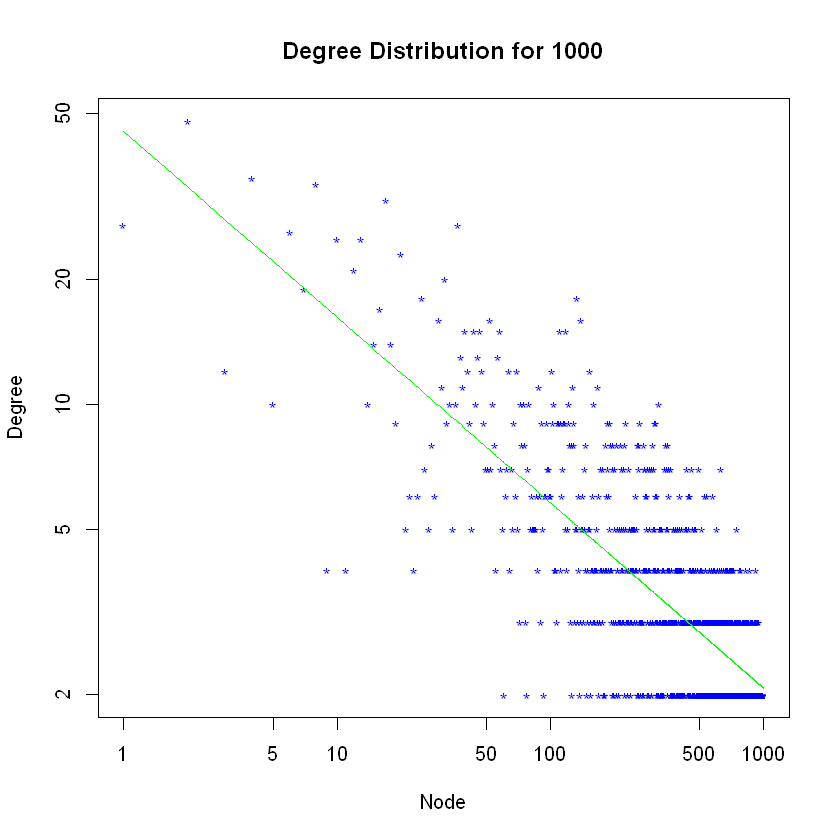

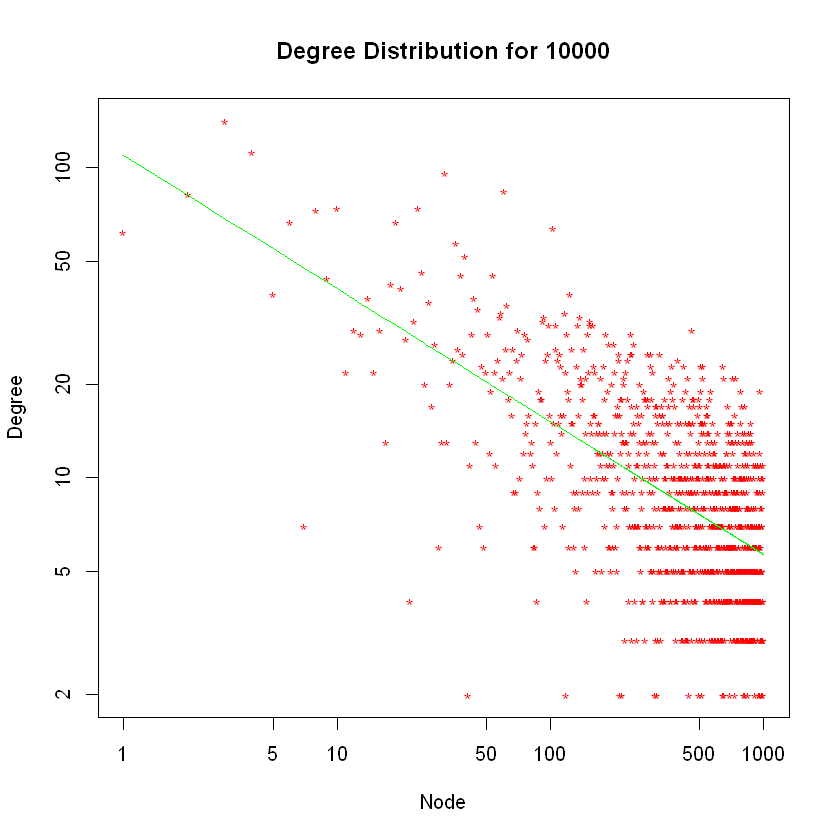

In [156]:
# For m=2

g_pa = sample_pa(n=1000, m=2, directed=FALSE)
r1 = cluster_fast_greedy(g_pa, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g_pa, r1_mem)

g_pa_big = sample_pa(n=10000, m=2, directed=FALSE)
r2 = cluster_fast_greedy(g_pa_big, merges = FALSE, modularity = FALSE, membership = TRUE)
r2_mem = membership(r2)
modularity(g_pa_big, r2_mem)

dd1 = degree_distribution(g_pa)
lab1 = seq(0, length(dd1)-1)
plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000", xlab="Degree", ylab="Number of Vertices", col="green", log="xy")

dd2 = degree_distribution(g_pa_big)
lab2 = seq(0, length(dd2)-1)
lines(lab2, dd2, col = "blue", log="xy")


legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

df1 <- data.frame("degree"=log(lab1), "freq"=log(dd1))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(lab2), "freq"=log(dd2))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1[1:13,])
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2[1:13,])
pred2 = predict(relation2)

relation1


relation2

plot(lab1, dd1, type="l", main="Degree Distribution for 1000 and 10000", xlab="Degree", ylab="Number of Vertices", col="blue", log="xy")
lines(lab2, dd2, col = "red", type="l")

lines(exp(df1[["degree"]][1:13]), exp(pred1), type="l" ,col = "green")
lines(exp(df2[["degree"]][1:13]), exp(pred2), type="l", col = "orange")

legend("topright", inset=0.01, legend=c("1000 Nodes", "10000 Nodes"),
       col=c("green", "blue"), lty=1:1, cex=0.8)

# Choosing 100 samples from the graph with 1000 nodes
# Choosinf 1000 samples from the graph with 10,000 nodes

samples1 = sample(1:1000, 400, replace=1)
samples2 = sample(1:10000, 4000, replace=1)

vs1 = adjacent_vertices(g_pa, samples1)
vs2 = adjacent_vertices(g_pa_big, samples2)

degs1 <- rep(0, length(vs1))
for (k in 1:length(vs1)){
  ind = sample(1:length(vs1[[k]]), 1)
  degs1[k] = degree(g_pa, vs1[[k]][ind])
  }  

cts1 = as.data.frame(table(degs1))

degs2 <- rep(0, length(vs2))
for (k in 1:length(vs2)){
  ind = sample(1:length(vs2[[k]]), 1)
  degs2[k] = degree(g_pa_big, vs2[[k]][ind])
  }  

cts2 = as.data.frame(table(degs2))

cts1_deg = rep(0,length(cts1[["degs1"]]))
cts1_freq = rep(0,length(cts1[["Freq"]]))

for (x in 1:length(cts1[["degs1"]])){
    cts1_deg[x] = cts1[["degs1"]][x]
    cts1_freq[x] = cts1[["Freq"]][x]
}


cts2_deg = rep(0,length(cts2[["degs2"]]))
cts2_freq = rep(0,length(cts2[["Freq"]]))

for (x in 1:length(cts2[["degs2"]])){
    cts2_deg[x] = cts2[["degs2"]][x]
    cts2_freq[x] = cts2[["Freq"]][x]
}

df1 <- data.frame("degree"=log(cts1_deg), "freq"=log(cts1_freq))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(cts2_deg), "freq"=log(cts2_freq))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(freq ~ degree, df1)
pred1 = predict(relation1)

relation2 <- lm(freq ~ degree, df2)
pred2 = predict(relation2)

relation1

relation2

plot(cts1_deg, cts1_freq, type = "p", col="red", main="Degree Distribution for 1000", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df1[["degree"]]), exp(pred1), type="l" ,col = "orange")

plot(cts2_deg, cts2_freq,, type = "p", col="blue", main="Degree Distribution for 10000", xlab="Degree", ylab="Frequency", log="xy")
lines(exp(df2[["degree"]]), exp(pred2), type="l" ,col = "green")

all_degrees1 = degree(g_pa, 1:1000)
all_degrees2 = degree(g_pa_big, 1:1000)

df1 <- data.frame("degree"=log(all_degrees1), "node"=log(c(1:1000)))
df1 <- df1[!is.infinite(rowSums(df1)),]

df2 <- data.frame("degree"=log(all_degrees2), "node"=log(c(1:1000)))
df2 <- df2[!is.infinite(rowSums(df2)),]

relation1 <- lm(degree ~ node, df1)
pred1 = predict(relation1)

relation2 <- lm(degree ~ node, df2)
pred2 = predict(relation2)

relation1

relation2

plot(1:1000, all_degrees1, type = "p", col="blue", main="Degree Distribution for 1000", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df1[["node"]]), exp(pred1), type="l" ,col = "green")

plot(1:1000, all_degrees2, type = "p", col="red", main="Degree Distribution for 10000", xlab="Node", ylab="Degree", pch="*", log="xy")
lines(exp(df2[["node"]]), exp(pred2), type="l" ,col = "green")

In [ ]:
# For m=5

In [24]:
# Question 2(h)
g1 = sample_pa(n=1000, m=1, directed=FALSE)
deg = degree(g1, 1:1000)
g2 = sample_degseq(deg)

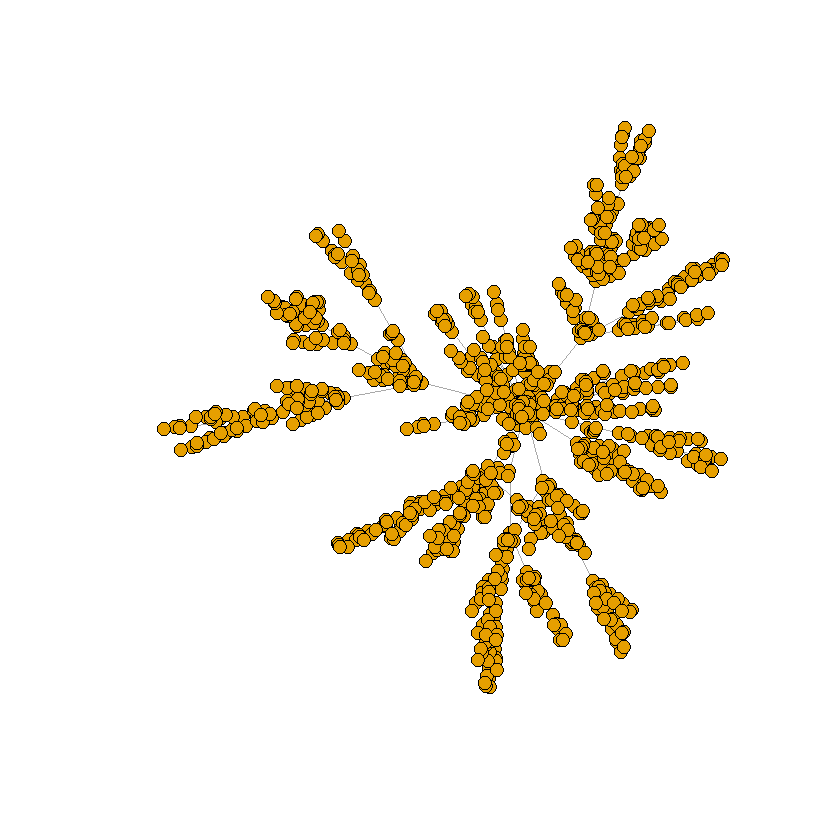

In [29]:
layout <-layout.fruchterman.reingold(g1)
plot(g1,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

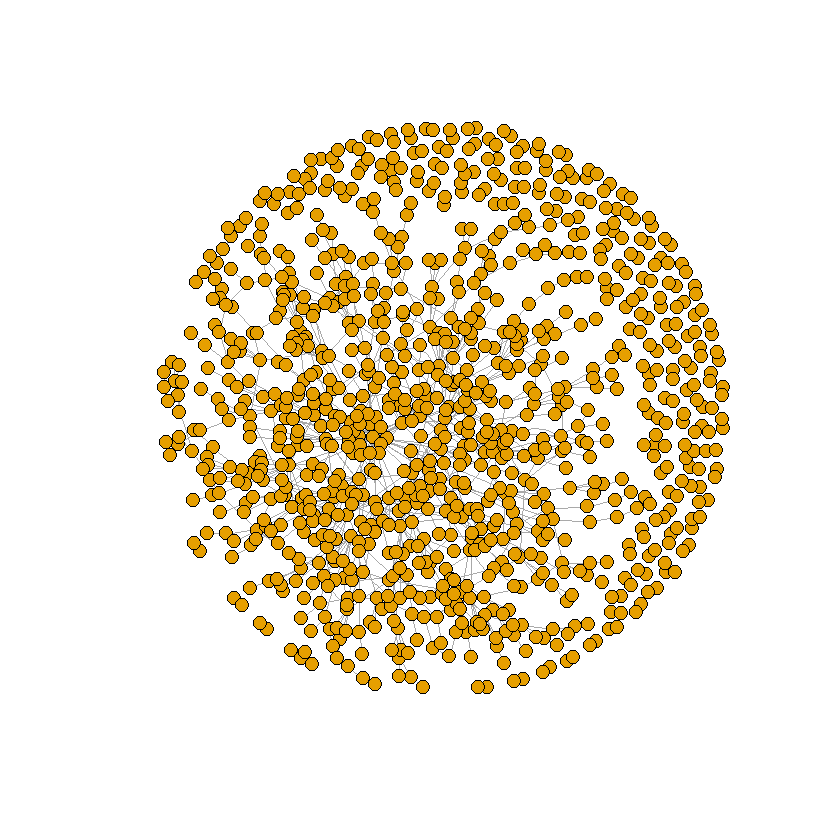

In [30]:
layout <-layout.fruchterman.reingold(g2)
plot(g2,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

[1] 0.9285206

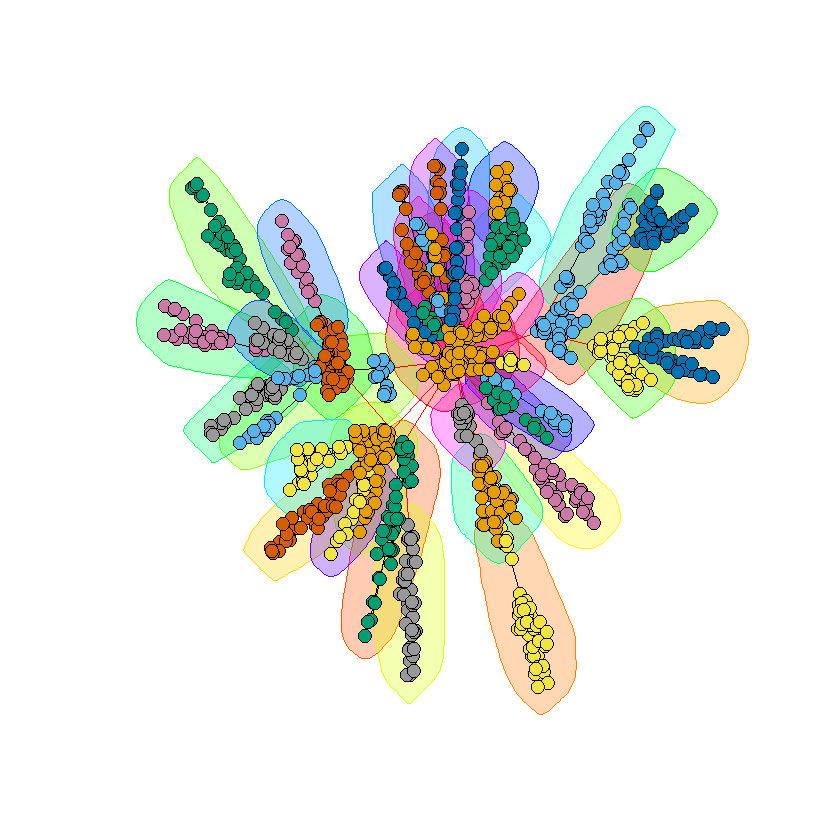

In [27]:
r1 = cluster_fast_greedy(g1, merges = FALSE, modularity = FALSE, membership = TRUE)
r1_mem = membership(r1)
modularity(g1, r1_mem)

layout <-layout.fruchterman.reingold(g1)
plot(r1, g1,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)

[1] 0.7684707

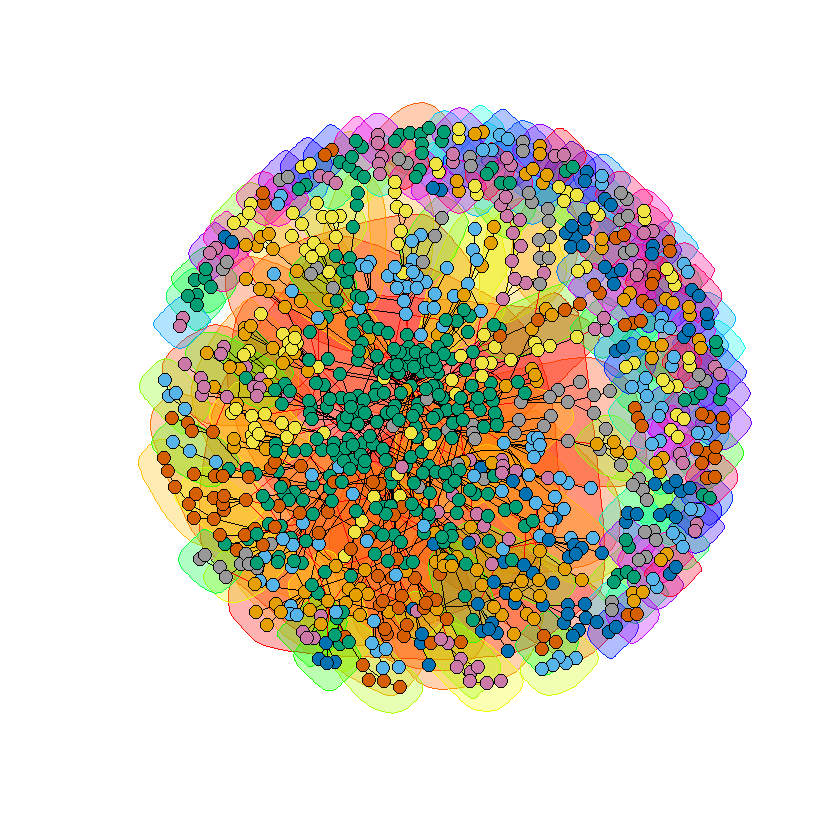

In [28]:
r2 = walktrap.community(g2) 
r2_mem = membership(r2)
modularity(g2, r2_mem)

layout <-layout.fruchterman.reingold(g2)
plot(r2, g2,  layout=layout, vertex.label=NA, vertex.size=5, edge.arrow.size=.2)